In [1]:

import sys
import operator
import argparse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import binom_test

In [3]:
def filter_file(read_file,write_file_true,write_file_fake):
    last_fake = -20
    last_true = -20
    line_count = 0

    for line in read_file:
        if line_count == 4:
            last_true = line_count
            write_file_true.write(line)
        if line_count == 5:
            last_fake = line_count
            write_file_fake.write(line)
        if line_count - last_true == 9:
            write_file_true.write(line)
            last_true = line_count
        if line_count - last_fake == 9:
            write_file_fake.write(line)
            last_fake = line_count
        line_count = line_count + 1
        

In [4]:
#filter file
file_name = 'test_out_20samples.txt'
out_true_file_name = 'test_out_20samples_true.txt'
out_fake_file_name = 'test_out_20samples_fake.txt'

read_file = open(file_name, encoding="utf8",mode='r')
write_file_true = open(out_true_file_name, encoding="utf8",mode='w')
write_file_fake = open(out_fake_file_name, encoding="utf8",mode='w')

filter_file(read_file,write_file_true,write_file_fake)

write_file_true.close()
write_file_fake.close()
read_file.close()


file_name = 'val_out_20samples.txt'
out_true_file_name = 'val_out_20samples_true.txt'
out_fake_file_name = 'val_out_20samples_fake.txt'

read_file = open(file_name, encoding="utf8",mode='r')
write_file_true = open(out_true_file_name, encoding="utf8",mode='w')
write_file_fake = open(out_fake_file_name, encoding="utf8",mode='w')

filter_file(read_file,write_file_true,write_file_fake)

write_file_true.close()
write_file_fake.close()
read_file.close()

In [5]:

#read real file
#read fake file
file_true = open('test_out_20samples_true.txt', encoding="utf8",mode='r')
file_fake = open('test_out_20samples_fake.txt', encoding="utf8",mode='r')
count_test = 0
for line in file_true.readlines(): 
    count_test += 1

In [6]:
def find_changes(file1, file2, count):
    for i in range(0,count):
        line_true = file1.readline().rstrip("\n").rstrip(" ")
        line_changes = file2.readline().rstrip("\n").rstrip(" ")
        line_true_split = line_true.split(' ')
        line_changes_split = line_changes.split(' ')
        
        for j in range(0,len(line_true_split)):

            word_true = line_true_split[j]
            word_change = line_changes_split[j]
            
            if word_true in changes:
                if word_change in changes[word_true]:
                    changes[word_true][word_change] += 1
                else:
                    changes[word_true][word_change] = 1
            else:
                changes[word_true] = {}
                changes[word_true][word_change] = 1

        

In [7]:
file_true = open('test_out_20samples_true.txt', encoding="utf8",mode='r')
file_fake = open('test_out_20samples_fake.txt', encoding="utf8",mode='r')

#empty dict for the changes
changes = {}

find_changes(file_true, file_fake, count_test)

file_true.close()
file_fake.close()

In [8]:

#read real file
#read fake file
file_true = open('val_out_20samples_true.txt', encoding="utf8",mode='r')
file_fake = open('val_out_20samples_fake.txt', encoding="utf8",mode='r')
count_val = 0
for line in file_true.readlines(): 
    count_val += 1

In [9]:
file_true = open('val_out_20samples_true.txt', encoding="utf8",mode='r')
file_fake = open('val_out_20samples_fake.txt', encoding="utf8",mode='r')


find_changes(file_true, file_fake, count_test)

file_true.close()
file_fake.close()

In [10]:
#file_true = open('train_real_lm_20samples.txt', encoding="utf8",mode='r')
#file_fake = open('train_fake_lm_20samples.txt', encoding="utf8",mode='r')
#count_train = 0
#for line in file_true.readlines(): 
#    count_train += 1

In [11]:
#file_true = open('train_real_lm_20samples.txt', encoding="utf8",mode='r')
#file_fake = open('train_fake_lm_20samples.txt', encoding="utf8",mode='r')

#find_changes(file_true, file_fake, count_train)

#file_true.close()
#file_fake.close()

In [12]:
all_words = list(changes.keys())
len(all_words)

18329

In [13]:
for word in all_words:
    if len(changes[word]) == 1:
        del changes[word]

In [14]:
words_to_add_in_matrix = ['an', 'had', '@-@', 'on', 'by', 'at', 'as', 'of', 'with', 'from', 'were', 'been', 'that', 'could', 'also',',','was','but','and']

In [15]:
len(words_to_add_in_matrix)

19

In [16]:
words_matrix = {}
sum_words_changes = {}

for word in words_to_add_in_matrix:
    words_matrix[word] = {}
    count_changes = 0 
    for word_change in changes[word]:
        count_changes = count_changes + changes[word][word_change]
    sum_words_changes[word] = count_changes
    
    for word_change in words_to_add_in_matrix:
        if word_change in changes[word]:
            words_matrix[word][word_change] = changes[word][word_change]
        else:
            words_matrix[word][word_change] = 0
    

In [17]:
#for word in words_matrix:
#    for word_change in words_matrix[word]:
#        words_matrix[word][word_change] = words_matrix[word][word_change]/sum_words_changes[word]

In [18]:
words_matrix_np = np.zeros([len(words_to_add_in_matrix),len(words_to_add_in_matrix)])

for word1 in words_to_add_in_matrix:
    idx1 = words_to_add_in_matrix.index(word1)
    for word2 in words_to_add_in_matrix:
        idx2 = words_to_add_in_matrix.index(word2)
        words_matrix_np[idx1,idx2] = words_matrix[word1][word2]
        

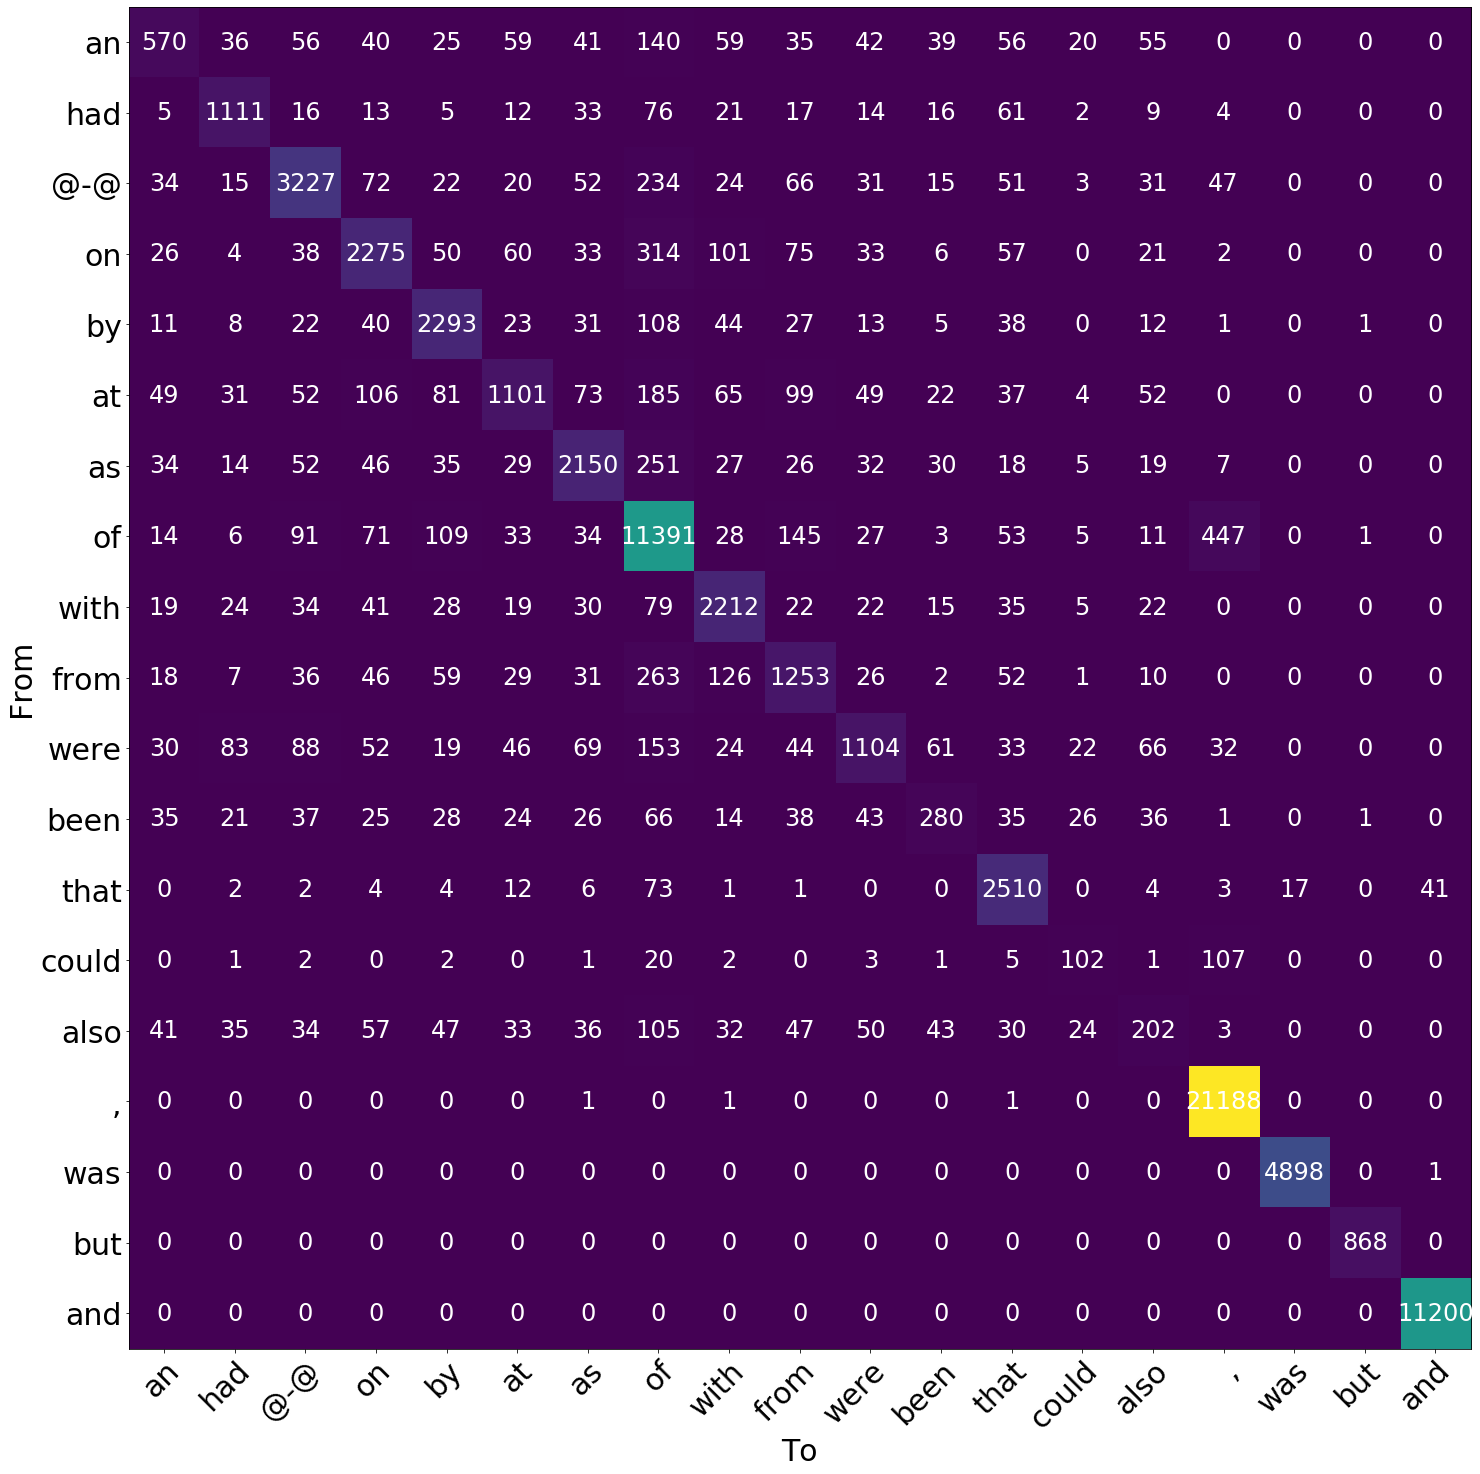

In [19]:

import matplotlib
import matplotlib.pyplot as plt



#fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 24})
fig = plt.figure(figsize=(21,21))
ax = fig.add_subplot(111)
im = ax.imshow(words_matrix_np)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


# We want to show all ticks...
ax.set_xticks(np.arange(len(words_to_add_in_matrix)))
ax.set_yticks(np.arange(len(words_to_add_in_matrix)))

# ... and label them with the respective list entries
ax.set_xticklabels(words_to_add_in_matrix)
ax.set_yticklabels(words_to_add_in_matrix)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(words_to_add_in_matrix)):
    for j in range(len(words_to_add_in_matrix)):
        text = ax.text(j, i, int(words_matrix_np[i, j]),
                       ha="center", va="center", color="w")
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
#matplotlib.rc('xtick', labelsize=33) 
#matplotlib.rc('ytick', labelsize=36) 
matplotlib.rc('axes', titlesize=30)
plt.ylabel('From',fontsize=30)
plt.xlabel('To',fontsize=30)

#ax.set_title("Changing of words from original to modified text")
fig.tight_layout()
plt.savefig('matrix_square_val_test.pdf')  
plt.show()


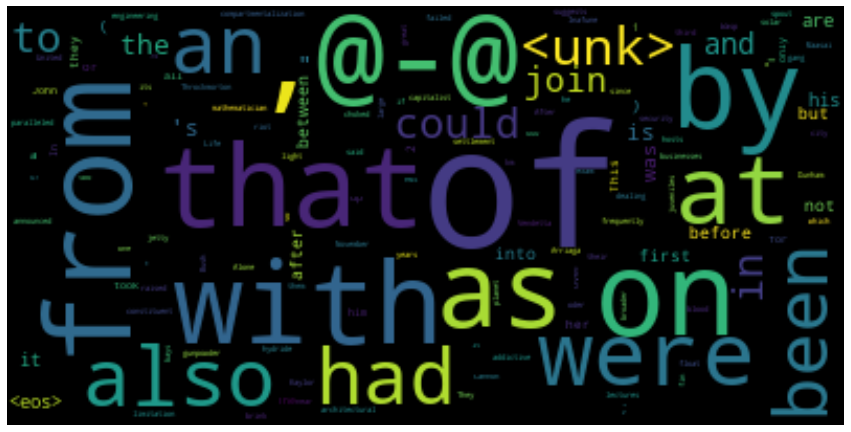

In [20]:

#words that the model changed to 
unique_msg_holding_words = {}
for word in changes:
    for word_replaced in changes[word]:
        if word_replaced != word:
            if word_replaced in unique_msg_holding_words:
                unique_msg_holding_words[word_replaced] += changes[word][word_replaced]
            else:
                unique_msg_holding_words[word_replaced] = changes[word][word_replaced]
#words in the new text that are now used to hold the message 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud_after = WordCloud(stopwords=[], background_color="black", max_font_size=80,relative_scaling=0.4, max_words=300).generate_from_frequencies(unique_msg_holding_words)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.savefig('msg_holding_words_val_test.pdf')  
plt.show()

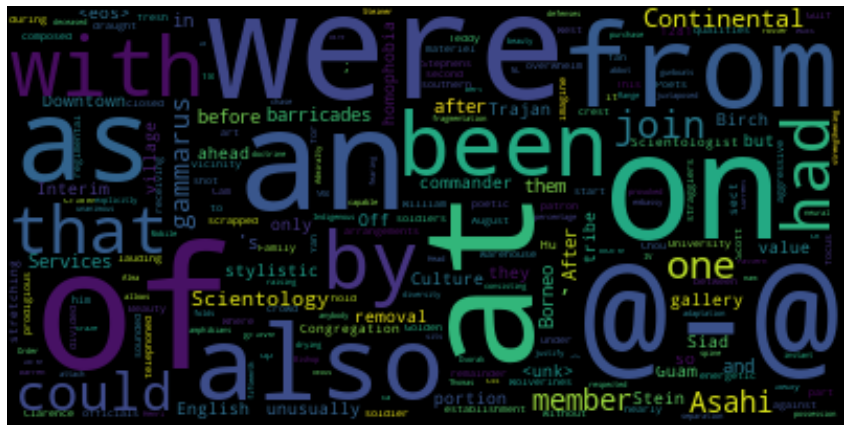

In [22]:
#words that the model changed from
unique_changed_words = {}

for word in changes:
    count_changes = 0
    for word_changed in changes[word]:
        if word_changed == word:
            continue
        else:
            count_changes += changes[word][word_changed]
    unique_changed_words[word] = count_changes
    
#words in the before text that were replaced
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud_before = WordCloud(stopwords=[], background_color="black", max_font_size=80, relative_scaling=0.3, max_words=500,prefer_horizontal=0.9).generate_from_frequencies(unique_changed_words)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_before,interpolation='bilinear')
plt.axis("off")
plt.savefig('changed_from_words_val_test.pdf')  
plt.show()
